# Exploration spark: "What's the most cliche song ever written? How do we even measure cliche-ness?"

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.__version__

'1.19.5'

# Pull in data (prepped in other notebook)

In [3]:
df = pd.read_csv('./data/2 OUTPUT Songs with metadata and lyrics.csv')

In [4]:
df.head()

,SongID,Performer,Song,spotify_genre,spotify_track_preview_url,spotify_track_explicit,spotify_track_album,WeekID,Peak Position,Lyrics
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,"['album rock', 'classic rock', 'folk rock', 'm...",NaN,False,Walls And Bridges,2/22/1975,9,"[Verse 1]\nSo long ago\nWas it in a dream, was..."
1,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,Jay-Z Featuring Beyonce Knowles,'03 Bonnie & Clyde,"['east coast hip hop', 'hip hop', 'pop rap', '...",NaN,True,The Blueprint 2 The Gift & The Curse,12/28/2002,4,"[Intro: Jay Z]\nUhh, uhh, uhh\nYou ready, B?\n..."
2,'65 Love AffairPaul Davis,Paul Davis,'65 Love Affair,"['album rock', 'bubblegum pop', 'country rock'...",https://p.scdn.co/mp3-preview/a701445830ecacfb...,False,Radio Hits Of the '80s,6/12/1982,6,'65 love affair\nPaul Davis\n\nI was a car hop...
3,('til) I Kissed YouThe Everly Brothers,The Everly Brothers,('til) I Kissed You,"['adult standards', 'brill building pop', 'bub...",https://p.scdn.co/mp3-preview/c1719c80d7145e73...,False,The Very Best of The Everly Brothers,10/24/1959,4,Never felt like this until I kissed ya\nHow di...
4,(Can't Live Without Your) Love And AffectionNe...,Nelson,(Can't Live Without Your) Love And Affection,"['classic country pop', 'country', 'nashville ...",NaN,False,After The Rain (Remastered),12/22/1990,1,"(Here she comes) Mmm, just like an angel\nSeem..."


In [5]:
df[df.Song.str.contains('Rolling in the Deep', case=False)].Lyrics.iloc[0]

"[Verse 1]\nThere's a fire starting in my heart\nReaching a fever pitch, and it's bringing me out the dark\nFinally, I can see you crystal clear\nGo ahead and sell me out, and then I'll lay your ship [shit] bare\nSee how I'll leave with every piece of you\nDon't underestimate the things that I will do\nThere's a fire starting in my heart\nReaching a fever pitch, and it's bringing me out the dark\n\n[Pre-Chorus]\nThe scars of your love remind me of us\nThey keep me thinkin' that we almost had it all\nThe scars of your love, they leave me breathless\nI can't help feeling\n\n[Chorus]\nWe could have had it all\n(You're gonna wish you â\x80\x93 never had met me)\nRolling in the deep\n(Tears are gonna fall, rolling in the deep)\nYou had my heart inside of your hand\n(You're gonna wish you â\x80\x93 never had met me)\nAnd you played it to the beat\n(Tears are gonna fall, rolling in the deep)\n\n[Verse 2]\nBaby, I have no story to be told\nBut I've heard one on you\nNow I'm gonna make your hea

# Explode data into *one row per line*

In [6]:
lyrics_split_df = df.copy()
lyrics_split_df['Parsed Lyrics'] = df.Lyrics.apply(lambda l: l.split('\n'))

every_row_is_a_line_RAW = lyrics_split_df.explode('Parsed Lyrics').drop_duplicates(
    subset=['Parsed Lyrics', 'SongID']
).drop(
    columns=['Lyrics']
).rename(columns={'Parsed Lyrics': 'lyric_line'})


In [7]:
every_row_is_a_line_RAW

,SongID,Performer,Song,spotify_genre,spotify_track_preview_url,spotify_track_explicit,spotify_track_album,WeekID,Peak Position,lyric_line
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,"['album rock', 'classic rock', 'folk rock', 'm...",NaN,False,Walls And Bridges,2/22/1975,9,[Verse 1]
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,"['album rock', 'classic rock', 'folk rock', 'm...",NaN,False,Walls And Bridges,2/22/1975,9,So long ago
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,"['album rock', 'classic rock', 'folk rock', 'm...",NaN,False,Walls And Bridges,2/22/1975,9,"Was it in a dream, was it just a dream?"
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,"['album rock', 'classic rock', 'folk rock', 'm...",NaN,False,Walls And Bridges,2/22/1975,9,"I know, yes I know"
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,"['album rock', 'classic rock', 'folk rock', 'm...",NaN,False,Walls And Bridges,2/22/1975,9,"Seemed so very real, it seemed so real to me"
...,...,...,...,...,...,...,...,...,...,...
4518,iSpyKYLE Featuring Lil Yachty,KYLE Featuring Lil Yachty,iSpy,"['pop rap', 'rap']",https://p.scdn.co/mp3-preview/c4f8b370f963c3fd...,True,iSpy (feat. Lil Yachty),5/6/2017,4,"ArabamÄ±zda sert takÄ±lÄ±yoruz, gizemli Åeyle..."
4518,iSpyKYLE Featuring Lil Yachty,KYLE Featuring Lil Yachty,iSpy,"['pop rap', 'rap']",https://p.scdn.co/mp3-preview/c4f8b370f963c3fd...,True,iSpy (feat. Lil Yachty),5/6/2017,4,Beni siklememeye devam et
4518,iSpyKYLE Featuring Lil Yachty,KYLE Featuring Lil Yachty,iSpy,"['pop rap', 'rap']",https://p.scdn.co/mp3-preview/c4f8b370f963c3fd...,True,iSpy (feat. Lil Yachty),5/6/2017,4,"Uzun zamandÄ±r lÃ¼ks iÃ§inde yaÅÄ±yorum, hayÄ±r"
4518,iSpyKYLE Featuring Lil Yachty,KYLE Featuring Lil Yachty,iSpy,"['pop rap', 'rap']",https://p.scdn.co/mp3-preview/c4f8b370f963c3fd...,True,iSpy (feat. Lil Yachty),5/6/2017,4,Boat ve Kyle piyano tuÅlarÄ± gibi birbirinden...


### Filter & clean

In [8]:
ENDS_WITH_YEAR_IN_PAREN = '\(\d{4}?\)$'  # eg "... (2018)"
BRACKETED = '^\[.*?\]$'  # eg "[...]"
SONG_DASH_ARTIST = '[A-Z].+\s\-\s[A-Z].+'  # EG "Ariana Grande and Victoria MonÃ©t - MONOPOLY"

with_filters = every_row_is_a_line_RAW[
    ~every_row_is_a_line_RAW['lyric_line'].str.contains(
        f'{BRACKETED}|{ENDS_WITH_YEAR_IN_PAREN}|{SONG_DASH_ARTIST}', 
        regex= True, case=False, na=False
    )
]

In [9]:
with_more_filters = with_filters[
    ~with_filters.lyric_line.str.contains('" by ') &
    ~with_filters.lyric_line.str.contains('EmbedShare URLCopyEmbedCopy')
]

In [10]:
with_more_filters

,SongID,Performer,Song,spotify_genre,spotify_track_preview_url,spotify_track_explicit,spotify_track_album,WeekID,Peak Position,lyric_line
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,"['album rock', 'classic rock', 'folk rock', 'm...",NaN,False,Walls And Bridges,2/22/1975,9,So long ago
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,"['album rock', 'classic rock', 'folk rock', 'm...",NaN,False,Walls And Bridges,2/22/1975,9,"Was it in a dream, was it just a dream?"
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,"['album rock', 'classic rock', 'folk rock', 'm...",NaN,False,Walls And Bridges,2/22/1975,9,"I know, yes I know"
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,"['album rock', 'classic rock', 'folk rock', 'm...",NaN,False,Walls And Bridges,2/22/1975,9,"Seemed so very real, it seemed so real to me"
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,"['album rock', 'classic rock', 'folk rock', 'm...",NaN,False,Walls And Bridges,2/22/1975,9,
...,...,...,...,...,...,...,...,...,...,...
4518,iSpyKYLE Featuring Lil Yachty,KYLE Featuring Lil Yachty,iSpy,"['pop rap', 'rap']",https://p.scdn.co/mp3-preview/c4f8b370f963c3fd...,True,iSpy (feat. Lil Yachty),5/6/2017,4,"ArabamÄ±zda sert takÄ±lÄ±yoruz, gizemli Åeyle..."
4518,iSpyKYLE Featuring Lil Yachty,KYLE Featuring Lil Yachty,iSpy,"['pop rap', 'rap']",https://p.scdn.co/mp3-preview/c4f8b370f963c3fd...,True,iSpy (feat. Lil Yachty),5/6/2017,4,Beni siklememeye devam et
4518,iSpyKYLE Featuring Lil Yachty,KYLE Featuring Lil Yachty,iSpy,"['pop rap', 'rap']",https://p.scdn.co/mp3-preview/c4f8b370f963c3fd...,True,iSpy (feat. Lil Yachty),5/6/2017,4,"Uzun zamandÄ±r lÃ¼ks iÃ§inde yaÅÄ±yorum, hayÄ±r"
4518,iSpyKYLE Featuring Lil Yachty,KYLE Featuring Lil Yachty,iSpy,"['pop rap', 'rap']",https://p.scdn.co/mp3-preview/c4f8b370f963c3fd...,True,iSpy (feat. Lil Yachty),5/6/2017,4,Boat ve Kyle piyano tuÅlarÄ± gibi birbirinden...


# NOTE: I'm dropping any row with *any* MISSING DATA 
Maybe we try something less aggressive later (eg blank genre is ok)

In [11]:
COLUMNS_FOR_VIZ = ['Performer', 'Song', 'spotify_genre', 'lyric_line', 'WeekID']

lyric_lines_ready_for_analysis = (
    with_more_filters[
        COLUMNS_FOR_VIZ
    ]
    .replace('', np.nan)
    .dropna()
    .reset_index(drop=True)
)

lyric_lines_ready_for_analysis['lyric_line'] = lyric_lines_ready_for_analysis['lyric_line'].apply(
    lambda val: val and val.replace('â\x80\x99', "'")
)
lyric_lines_ready_for_analysis

,Performer,Song,spotify_genre,lyric_line,WeekID
0,John Lennon,#9 Dream,"['album rock', 'classic rock', 'folk rock', 'm...",So long ago,2/22/1975
1,John Lennon,#9 Dream,"['album rock', 'classic rock', 'folk rock', 'm...","Was it in a dream, was it just a dream?",2/22/1975
2,John Lennon,#9 Dream,"['album rock', 'classic rock', 'folk rock', 'm...","I know, yes I know",2/22/1975
3,John Lennon,#9 Dream,"['album rock', 'classic rock', 'folk rock', 'm...","Seemed so very real, it seemed so real to me",2/22/1975
4,John Lennon,#9 Dream,"['album rock', 'classic rock', 'folk rock', 'm...",Took a walk down the street,2/22/1975
...,...,...,...,...,...
142572,KYLE Featuring Lil Yachty,iSpy,"['pop rap', 'rap']","ArabamÄ±zda sert takÄ±lÄ±yoruz, gizemli Åeyle...",5/6/2017
142573,KYLE Featuring Lil Yachty,iSpy,"['pop rap', 'rap']",Beni siklememeye devam et,5/6/2017
142574,KYLE Featuring Lil Yachty,iSpy,"['pop rap', 'rap']","Uzun zamandÄ±r lÃ¼ks iÃ§inde yaÅÄ±yorum, hayÄ±r",5/6/2017
142575,KYLE Featuring Lil Yachty,iSpy,"['pop rap', 'rap']",Boat ve Kyle piyano tuÅlarÄ± gibi birbirinden...,5/6/2017


### Lyric lines by year (sanity check)

<AxesSubplot:>

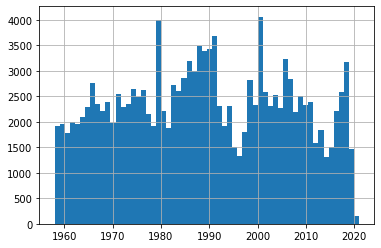

In [12]:
lyric_lines_ready_for_analysis.WeekID.apply(lambda d: int(d[-4:])).hist(bins=60)

In [13]:
lyric_lines_ready_for_analysis.to_csv('./data/3 OUTPUT One lyric lines per row, cleaned.csv', index=False)